The purpose of this notebook is to perform exploratory analysis on the Herlev and Sipakmed databases to ascertain the characteristic properties of cell nuclei and cytoplasm for subsequent segmentation. We will also attempt a random forest classifier on the available features to ascertain feature importance. This will guide subsequent segmentation attempts. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics as stats

#### Herlev dataset

In [185]:
Herlev_df = pd.read_excel('../data/Herlev_existing_database.xls')
Herlev_df['normal'] = [0 if Herlev_df['Class'][x] > 3 else 1 for x in range(len(Herlev_df))]

In [186]:
Herlev_df.keys()

Index(['ID', 'Kerne_A', 'Cyto_A', 'K/C', 'Kerne_Ycol', 'Cyto_Ycol',
       'KerneShort', 'KerneLong', 'KerneElong', 'KerneRund', 'CytoShort',
       'CytoLong', 'CytoElong', 'CytoRund', 'KernePeri', 'CytoPeri',
       'KernePos', 'KerneMax', 'KerneMin', 'CytoMax', 'CytoMin', 'Class',
       'normal'],
      dtype='object')

In [184]:
Herlev_df.head()

,ID,Kerne_A,Cyto_A,K/C,Kerne_Ycol,Cyto_Ycol,KerneShort,KerneLong,KerneElong,KerneRund,...,CytoRund,KernePeri,CytoPeri,KernePos,KerneMax,KerneMin,CytoMax,CytoMin,Class,normal
0,153958345-153958392-001.BMP,803.500,27804.125,0.028087,85.866083,192.524631,29.832191,34.828150,0.856554,0.843403,...,0.604273,101.375,673.500,0.230067,44,37,649,655,1,1
1,153960256-153960295-002.BMP,610.125,18067.875,0.032665,81.531353,153.439838,25.319871,30.805844,0.821918,0.818583,...,0.589351,85.250,597.000,0.043701,36,26,502,504,1,1
2,157181281-157181308-001.BMP,990.375,79029.875,0.012377,77.843655,118.001177,33.552901,38.327536,0.875425,0.858397,...,0.794843,111.750,1059.125,0.141150,53,37,2267,2500,1,1
3,157181387-157181418-001.BMP,554.500,98941.000,0.005573,70.054545,139.359845,23.799254,29.832868,0.797753,0.793271,...,0.695414,81.000,1264.500,0.079801,38,29,2885,2960,1,1
4,157181525-157181540-001.BMP,636.375,99663.250,0.006345,76.950949,137.748293,25.946189,31.256999,0.830092,0.829332,...,1.071126,87.875,1250.625,0.121304,36,24,2978,3159,1,1


Exploratory data analysis. Literature suggests that nucleus area and nucleus/cytoplasm area ratio are distinguishing features for normal vs abnormal cells.

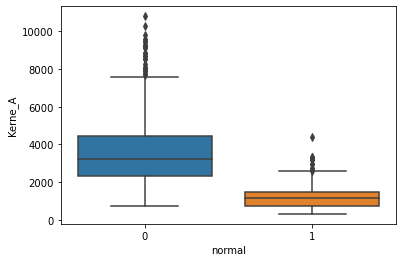

<AxesSubplot:xlabel='normal', ylabel='K/C'>

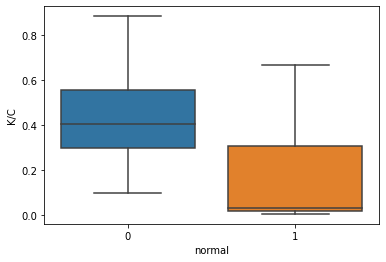

In [15]:
sns.boxplot(x='normal',y='Kerne_A',data=Herlev_df)
plt.show()
sns.boxplot(x='normal',y='K/C',data=Herlev_df)

Random forest classifier for an initial indication of which features are most important.

In [27]:
from sklearn.model_selection import train_test_split
X = Herlev_df.drop(['Class','normal','ID'],axis=1)
y = Herlev_df['normal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
preds = clf.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       203
           1       0.87      0.75      0.81        73

    accuracy                           0.91       276
   macro avg       0.89      0.86      0.87       276
weighted avg       0.90      0.91      0.90       276



In [75]:
important_features_dict = {}
for x,i in enumerate(clf.feature_importances_):
    important_features_dict[list(X_train.keys())[x]]=i

sorted_features = sorted(important_features_dict.items(), key=lambda kv: kv[1], reverse=True)
from collections import OrderedDict
OrderedDict(sorted_features)

OrderedDict([('KernePeri', 0.23077824169340136),
             ('Kerne_A', 0.20989999164827647),
             ('KerneLong', 0.15216604519627058),
             ('K/C', 0.12168574019602693),
             ('KerneMax', 0.08893238436105401),
             ('KerneShort', 0.04454983011124266),
             ('CytoMax', 0.03560532137295383),
             ('KerneMin', 0.030569855852423673),
             ('Cyto_A', 0.021784997916245115),
             ('CytoMin', 0.018456708442632325),
             ('CytoShort', 0.012698384615161384),
             ('CytoPeri', 0.011868772208991234),
             ('CytoLong', 0.010266453799465837),
             ('Kerne_Ycol', 0.004787180392755153),
             ('KernePos', 0.003054225667583618),
             ('CytoElong', 0.0014770319094360798),
             ('Cyto_Ycol', 0.0012545652630646697),
             ('KerneRund', 0.00016426935301509462),
             ('KerneElong', 0.0),
             ('CytoRund', 0.0)])

Conclusion: For the Herlev dataset,the most important features are Nuclei features (perimeter, area, axes lengths, and intensity), plus the nucleus to cytoplasm ratio. 
Now we'll get the distributions of some of these feature values to help us distinguish from debris. 

316.875


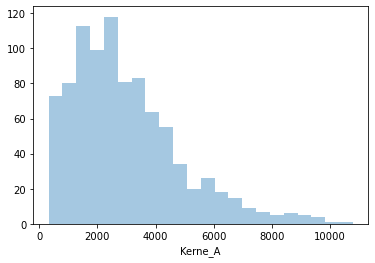

In [77]:
sns.distplot(Herlev_df.Kerne_A,kde=False)
print(Herlev_df.Kerne_A.min())

60.75


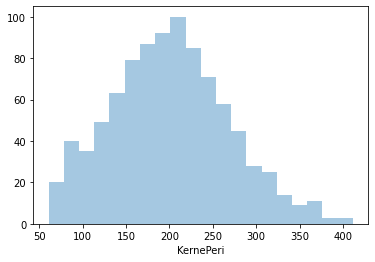

In [79]:
sns.distplot(Herlev_df.KernePeri,kde=False)
print(Herlev_df.KernePeri.min())

19.4164878389


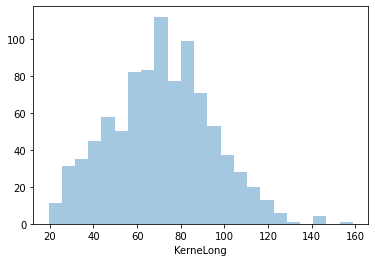

In [196]:
sns.distplot(Herlev_df.KerneLong,kde=False)
print(Herlev_df.KerneLong.min())

0.20109689213893966

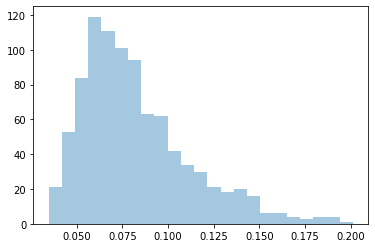

In [81]:
P2A = Herlev_df.KernePeri/Herlev_df.Kerne_A
sns.distplot(P2A,kde=False)
np.max(P2A)

19
430


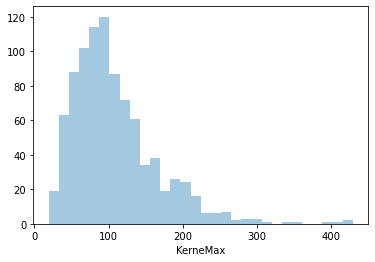

In [83]:
sns.distplot(Herlev_df.KerneMax,kde=False)
print(Herlev_df.KerneMax.min())
print(Herlev_df.KerneMax.max())

#### Sipakmed dataset

In [108]:
sipakmed_df = pd.DataFrame()
df2 = pd.read_table('../data/Sipakmed_existing_database/DYSKERATOTIC_CYTOPLASM_FEAT.dat',sep=',',header=None)
df2[28] = 'cyto'
df2[29] = 'd'
df2[30] = 0
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/DYSKERATOTIC_NUCLEI_FEAT.dat',sep=',',header=None)
df2[28] = 'nuc'
df2[29] = 'd'
df2[30] = 0
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/KOILOCYTOTIC_CYTOPLASM_FEAT.dat',sep=',',header=None)
df2[28] = 'cyto'
df2[29] = 'k'
df2[30] = 0
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/KOILOCYTOTIC_NUCLEI_FEAT.dat',sep=',',header=None)
df2[28] = 'nuc'
df2[29] = 'k'
df2[30] = 0
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/PARABASAL_CYTOPLASM_FEAT.dat',sep=',',header=None)
df2[28] = 'cyto'
df2[29] = 'p'
df2[30] = 1
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/PARABASAL_NUCLEI_FEAT.dat',sep=',',header=None)
df2[28] = 'nuc'
df2[29] = 'p'
df2[30] = 1
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/SUP_INT_CYTOPLASM_FEAT.dat',sep=',',header=None)
df2[28] = 'cyto'
df2[29] = 's'
df2[30] = 1
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/SUP_INT_NUCLEI_FEAT.dat',sep=',',header=None)
df2[28] = 'nuc'
df2[29] = 's'
df2[30] = 1
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/METAPLASTIC_CYTOPLASM_FEAT.dat',sep=',',header=None)
df2[28] = 'cyto'
df2[29] = 'm'
df2[30] = 2
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/METAPLASTIC_NUCLEI_FEAT.dat',sep=',',header=None)
df2[28] = 'nuc'
df2[29] = 'm'
df2[30] = 2
sipakmed_df = pd.concat([sipakmed_df,df2])

In [109]:
sipakmed_df.to_csv('../data/Sipakmed_existing_database.csv')

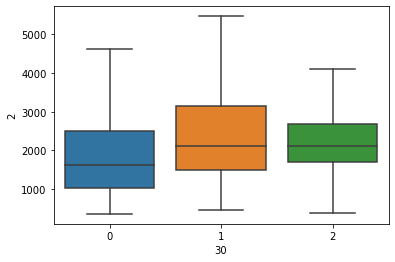

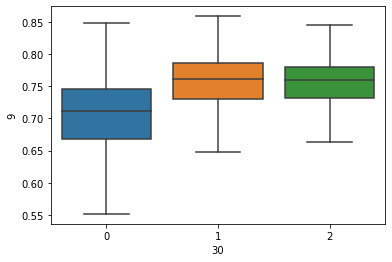

In [187]:
sns.boxplot(x=30,y=2,data=sipakmed_df[sipakmed_df[28]=='nuc'],showfliers=False)
plt.show()
sns.boxplot(x=30,y=9,data=sipakmed_df[sipakmed_df[28]=='nuc'],showfliers=False)
plt.show()

In [135]:
df_reduced = sipakmed_df[sipakmed_df[29]!='m']

In [162]:
df = df_reduced[df_reduced[28]=='nuc']
df[31] = df_reduced[df_reduced[28]=='nuc'][2]/df_reduced[df_reduced[28]=='cyto'][2] # add a column that has the N/C area ratio

/opt/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [163]:
from sklearn.model_selection import train_test_split
X = df.drop([0,1,28,29,30],axis=1)
y = df[30]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y)

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [165]:
from sklearn.metrics import classification_report,confusion_matrix
preds = clf.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       492
           1       0.81      0.96      0.88       485

    accuracy                           0.87       977
   macro avg       0.88      0.87      0.87       977
weighted avg       0.88      0.87      0.87       977



In [166]:
important_features_dict = {}
for x,i in enumerate(clf.feature_importances_):
    important_features_dict[list(X_train.keys())[x]]=i

sorted_features = sorted(important_features_dict.items(), key=lambda kv: kv[1], reverse=True)
from collections import OrderedDict
OrderedDict(sorted_features)

OrderedDict([(31, 0.21092328037230557),
             (16, 0.1505876094121862),
             (26, 0.12278565312790327),
             (22, 0.11289917154819139),
             (9, 0.0816593377655758),
             (27, 0.0779487145468169),
             (8, 0.06308601190720567),
             (20, 0.03548536838766211),
             (24, 0.033426572378719356),
             (23, 0.028439805081092343),
             (21, 0.014223941730001355),
             (4, 0.010550986552305812),
             (12, 0.009205135237878788),
             (17, 0.009167936847522337),
             (18, 0.008478041092078944),
             (2, 0.006660663328550874),
             (15, 0.006638062779574652),
             (25, 0.004365712339253348),
             (11, 0.0038254729933202003),
             (3, 0.003144936501649798),
             (7, 0.00217099134232031),
             (19, 0.001643770993159592),
             (10, 0.0013819602546577482),
             (13, 0.0013008634800677381),
             (5, 0.0),
        

For the Sipakmed dataset, the performance is better (without fine tuning) when we include information about the cytoplasm. Also, in the EDA, we see that there isn't a clea relationship between nucleus area and normal vs abnormal class - in fact, to the extent that there is a relationship, it is the opposite of what we see in the other dataset. This might be because the sipakmed dataset contains cell images at a much earlier stage of diagnosis. 

The lower limit of nuclei sizes is similar between the two datasets.

362.0
this dataset has an outlier


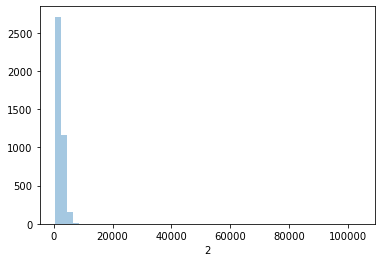

In [182]:
sns.distplot(sipakmed_df[sipakmed_df[28]=='nuc'][2],kde=False)
print(sipakmed_df[sipakmed_df[28]=='nuc'][2].min())
print('this dataset has an outlier')

0.069324


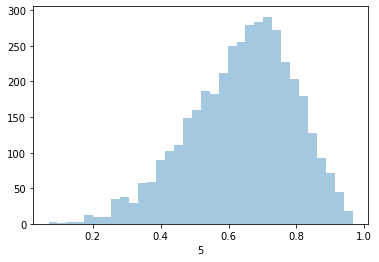

In [195]:
sns.distplot(sipakmed_df[sipakmed_df[28]=='nuc'][5],kde=False)
print(sipakmed_df[sipakmed_df[28]=='nuc'][5].min())